In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial.distance import euclidean, pdist, squareform
from sklearn.utils.extmath import randomized_svd
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors


In [165]:
df = pd.read_csv("../data/interim/user_track_df.csv", index_col=[0])


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, user_000001 to user_001000
Columns: 178423 entries, ! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_05. Astrolog to Ｄｊ　Ｋａｗａｓａｋｉ_Ｌｉｋｅ　Ｔｈｕｎｄｅｒ
dtypes: int64(178423)
memory usage: 803.1+ MB


In [167]:
df.describe()

,"! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_05. Astrolog","! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_07. Syn Marnotrawny","! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_16. Pejzaz Zimowy","! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_17. Koniec Wojny 30-Letniej","! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_20. Rozmowa","! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_21. Kantyczka Z Lotu Ptaka",!!!_A New Name,!!!_All My Heroes Are Weirdos,!!!_Bend Over Beethoven,!!!_Bend Over Beethoven (Original Nashville Jam),...,黒夢_Let'S Dance,黒夢_少年 -Screw Mix-,齋藤彩夏_Doki Doki Waku Waku,齋藤彩夏_ドキドキ☆ワクワク♪,서태지_I'M Gonna Forget You,소영_Turn Right At Midnight,유승준_Shut Up!!,이병우_Starving Brothers,이수영_Hatred,Ｄｊ Ｋａｗａｓａｋｉ_Ｌｉｋｅ Ｔｈｕｎｄｅｒ
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.001695,0.001695,0.001695,0.003390,0.001695,0.001695,0.022034,0.016949,0.008475,0.001695,...,0.001695,0.001695,0.001695,0.001695,0.001695,0.003390,0.008475,0.001695,0.001695,0.001695
std,0.041169,0.041169,0.041169,0.082339,0.041169,0.041169,0.304782,0.201145,0.108686,0.041169,...,0.041169,0.041169,0.041169,0.041169,0.041169,0.082339,0.205847,0.041169,0.041169,0.041169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,7.000000,4.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000


# convert counts to ratings

There are a few ways to divide the original counts to a value within a certain range. Here we use MinMaxScaler

In [168]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)

In [175]:
np.sum(df_scaled, axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

# substract row means

In [179]:
def substract_mean(_df):
    df_values = _df.copy()
    df_values = df_values.astype(np.float16)
    # set zero values to nan, so that we only calatulate the mean of the non-zero values
    df_values[df_values == 0] = np.nan
    row_means = np.nanmean(df_values, axis=1)
    # subtract the mean from each row
    mean_removed_values = df_values - row_means.reshape(-1, 1)
    # convert na to zero
    return np.nan_to_num(mean_removed_values)

In [180]:
# # convert df to np array
# df_values = df.values
# df_values = df_values.astype(np.float16)
# # set zero values to nan, so that we only calatulate the mean of the non-zero values
# df_values[df_values == 0] = np.nan
# row_means = np.nanmean(df_values, axis=1)
# # subtract the mean from each row
# mean_removed_values = df_values - row_means.reshape(-1, 1)
# # convert na to zero
# without scaling
mean_removed_values = substract_mean(df.values)
# with scaling
mean_removed_scaled = substract_mean(df_scaled)

# dimensionality reduction

In [94]:
from sklearn.utils.extmath import randomized_svd

U, S, V = randomized_svd(mean_removed_values, n_components=200, random_state=0)
X_after_rd = U @ np.diag(S)
# reduced_df = pd.DataFrame(X_after_rd, index=df.index, columns=[f"col_{i}" for i in range(200)])

In [182]:
U, S, V = randomized_svd(mean_removed_scaled, n_components=200, random_state=0)
X_after_rd_scaled = U @ np.diag(S)

# calculate similarity matrix

In [137]:
def similarity_func(x, y):
    return 1 /(1 + euclidean(x, y))
dists = pdist(X_after_rd, similarity_func)
df_euclid = pd.DataFrame(squareform(dists), columns=df.index, index=df.index)

In [138]:
df_euclid

,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000009,user_000010,user_000011,user_000012,...,user_000980,user_000986,user_000989,user_000991,user_000992,user_000993,user_000994,user_000995,user_000998,user_001000
user_000001,0.000000,0.017294,0.021179,0.007151,0.013723,0.021119,0.021179,0.011766,0.021179,0.012874,...,0.011096,0.011125,0.021179,0.021174,0.021178,0.015084,0.021119,0.006260,0.021179,0.021093
user_000002,0.017294,0.000000,0.029359,0.007349,0.015337,0.028798,0.029359,0.012733,0.029359,0.014176,...,0.011902,0.011948,0.029359,0.029310,0.029358,0.017484,0.029328,0.006393,0.029364,0.029266
user_000003,0.021179,0.029359,0.000000,0.007578,0.017845,0.215674,1.000000,0.014058,1.000000,0.016086,...,0.012953,0.013019,1.000000,0.466594,0.751954,0.021490,0.221329,0.006541,0.784936,0.199940
user_000004,0.007151,0.007349,0.007578,0.000000,0.006991,0.007575,0.007578,0.006686,0.007578,0.006873,...,0.006561,0.006565,0.007578,0.007577,0.007578,0.007160,0.007575,0.004962,0.007578,0.007576
user_000005,0.013723,0.015337,0.017845,0.006991,0.000000,0.017790,0.017845,0.011093,0.017845,0.012014,...,0.010528,0.010574,0.017845,0.017826,0.017845,0.013508,0.017781,0.006140,0.017845,0.017801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000993,0.015084,0.017484,0.021490,0.007160,0.013508,0.021460,0.021490,0.011818,0.021490,0.012948,...,0.011143,0.011200,0.021490,0.021486,0.021493,0.000000,0.021416,0.006266,0.021483,0.021392
user_000994,0.021119,0.029328,0.221329,0.007575,0.017781,0.163436,0.221329,0.014041,0.221329,0.016061,...,0.012878,0.013002,0.221329,0.204718,0.219979,0.021416,0.000000,0.006579,0.218899,0.160542
user_000995,0.006260,0.006393,0.006541,0.004962,0.006140,0.006539,0.006541,0.005942,0.006541,0.006074,...,0.005843,0.006370,0.006541,0.006539,0.006541,0.006266,0.006579,0.000000,0.006542,0.006539
user_000998,0.021179,0.029364,0.784936,0.007578,0.017845,0.216460,0.784936,0.014058,0.784936,0.016086,...,0.012953,0.013019,0.784936,0.463274,0.731218,0.021483,0.218899,0.006542,0.000000,0.201758


In [214]:
def similarity_func(x, y):
    return 1 /(1 + euclidean(x, y))
dists_scaled = pdist(X_after_rd_scaled, similarity_func)
df_euclid_scaled = pd.DataFrame(squareform(dists_scaled), columns=df.index, index=df.index)

In [215]:
df_euclid_scaled

,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000009,user_000010,user_000011,user_000012,...,user_000980,user_000986,user_000989,user_000991,user_000992,user_000993,user_000994,user_000995,user_000998,user_001000
user_000001,0.000000,0.102983,0.327365,0.283749,0.107542,0.325755,0.327365,0.327395,0.327360,0.099863,...,0.203053,0.089315,0.326427,0.183876,0.288265,0.142035,0.155108,0.121161,0.311259,0.089942
user_000002,0.102983,0.000000,0.105724,0.103530,0.078856,0.105672,0.105724,0.105723,0.105724,0.075978,...,0.099109,0.071266,0.105960,0.097071,0.104691,0.089368,0.093683,0.084202,0.105822,0.071320
user_000003,0.327365,0.105724,0.000000,0.355210,0.110717,0.779212,1.000000,0.980163,0.995989,0.102454,...,0.239527,0.091213,0.718182,0.209518,0.438506,0.148752,0.167946,0.126581,0.538790,0.091857
user_000004,0.283749,0.103530,0.355210,0.000000,0.108544,0.355619,0.355210,0.355132,0.355185,0.100584,...,0.241612,0.089826,0.348619,0.190344,0.303231,0.141328,0.157925,0.123580,0.327612,0.091506
user_000005,0.107542,0.078856,0.110717,0.108544,0.000000,0.110580,0.110717,0.110716,0.110717,0.078889,...,0.103180,0.073372,0.110645,0.101363,0.109497,0.091134,0.098832,0.085821,0.110199,0.072802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000993,0.142035,0.089368,0.148752,0.141328,0.091134,0.148487,0.148752,0.148761,0.148752,0.088409,...,0.140194,0.079488,0.148931,0.129262,0.144914,0.000000,0.113938,0.100190,0.149309,0.081545
user_000994,0.155108,0.093683,0.167946,0.157925,0.098832,0.167357,0.167946,0.167974,0.167951,0.090276,...,0.155674,0.083272,0.167353,0.172032,0.166304,0.113938,0.000000,0.103591,0.167224,0.082876
user_000995,0.121161,0.084202,0.126581,0.123580,0.085821,0.126418,0.126581,0.126576,0.126581,0.083615,...,0.113784,0.072919,0.127733,0.110997,0.125055,0.100190,0.103591,0.000000,0.127890,0.076482
user_000998,0.311259,0.105822,0.538790,0.327612,0.110199,0.530437,0.538790,0.538400,0.538811,0.102092,...,0.238057,0.090918,0.545071,0.209077,0.424386,0.149309,0.167224,0.127890,0.000000,0.091864


# find nearest neighbors

In [216]:
neigh = NearestNeighbors(n_neighbors=5, metric="manhattan")
neigh.fit(X_after_rd)
neigh.kneighbors(X_after_rd[3].reshape(1,-1))

(array([[  0.        , 158.9567514 , 159.02488552, 159.10783892,
         159.11014063]]),
 array([[  3,  35, 237, 251, 243]]))

In [217]:
neigh = NearestNeighbors(n_neighbors=5, metric="manhattan")
neigh.fit(X_after_rd_scaled)
neigh.kneighbors(X_after_rd_scaled[3].reshape(1,-1))

(array([[ 0.        , 16.45705325, 19.7965379 , 19.81530064, 20.14015879]]),
 array([[  3, 171, 385, 528, 309]]))

# clustering

In [126]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering


## HAC

In [228]:
# first build a pairwise distances array between all users
dists = pdist(X_after_rd, 'euclidean')
# build linkage matrix
linkage_matrix = linkage(dists, 'ward')
# cut the linkage matrix at the specified distance

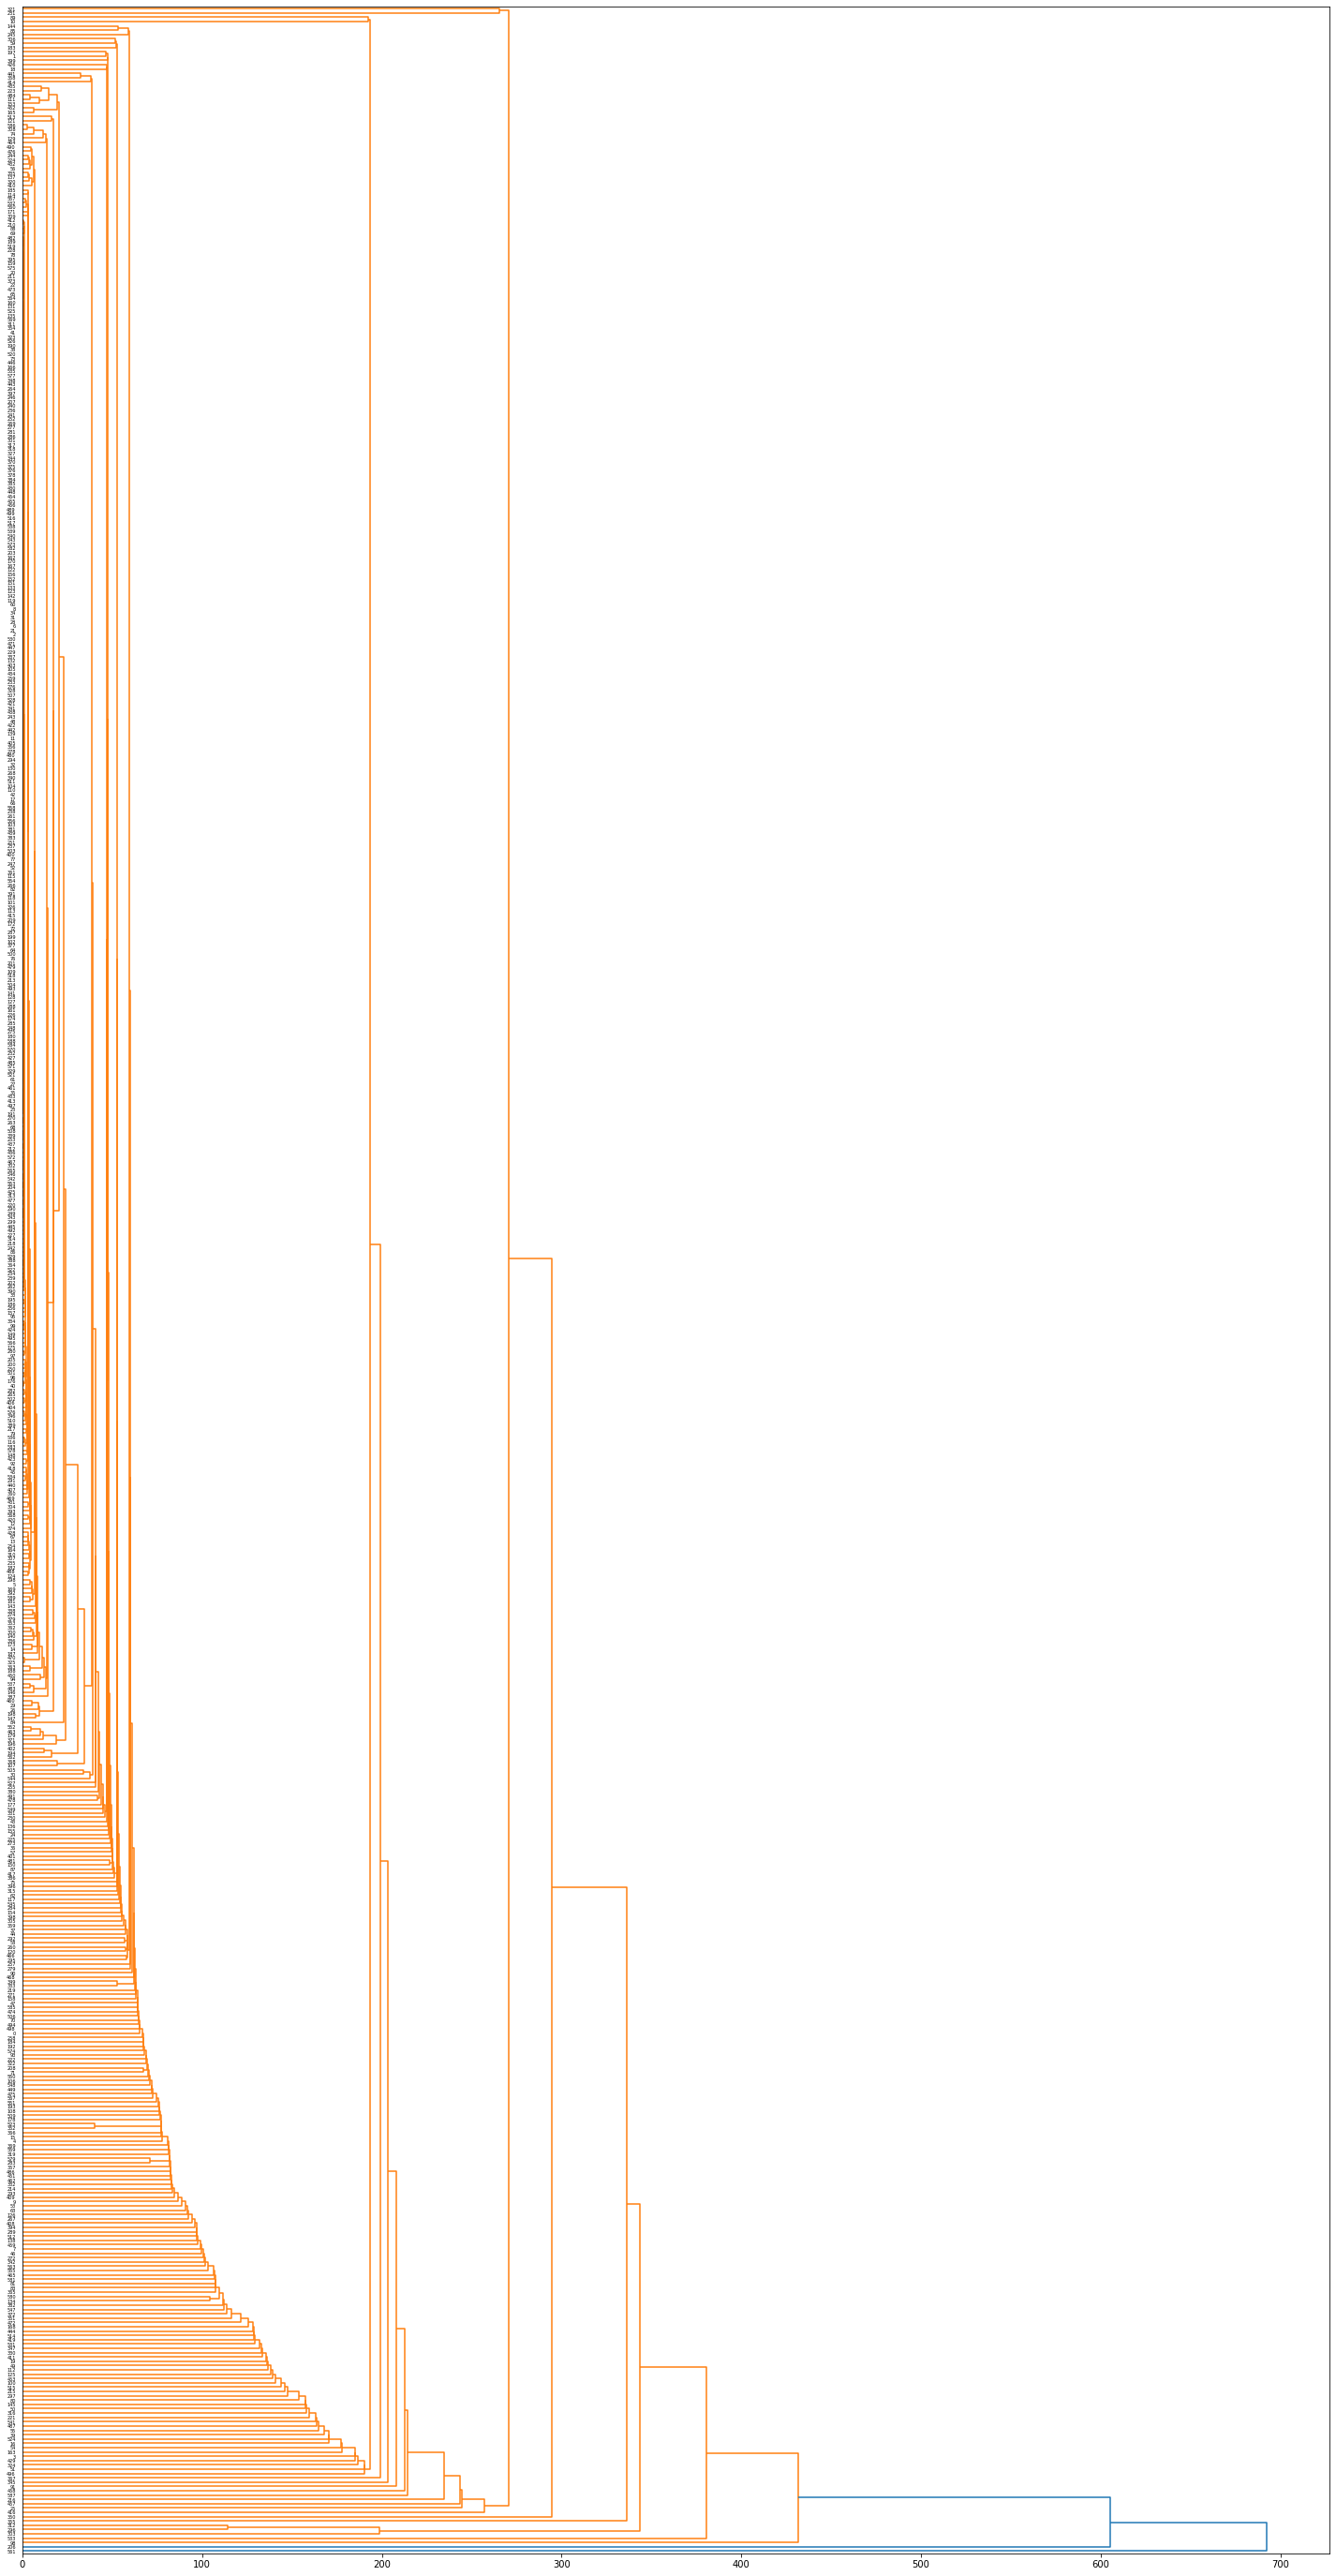

In [218]:
# plot the dendrogram
fig = plt.figure(figsize=(25, 50))
dn = dendrogram(linkage_matrix, orientation='right')
plt.show()

In [232]:
assignments = fcluster(linkage_matrix, 100, 'distance')
silhouette_score(X_after_rd, assignments)

0.6263591175905229

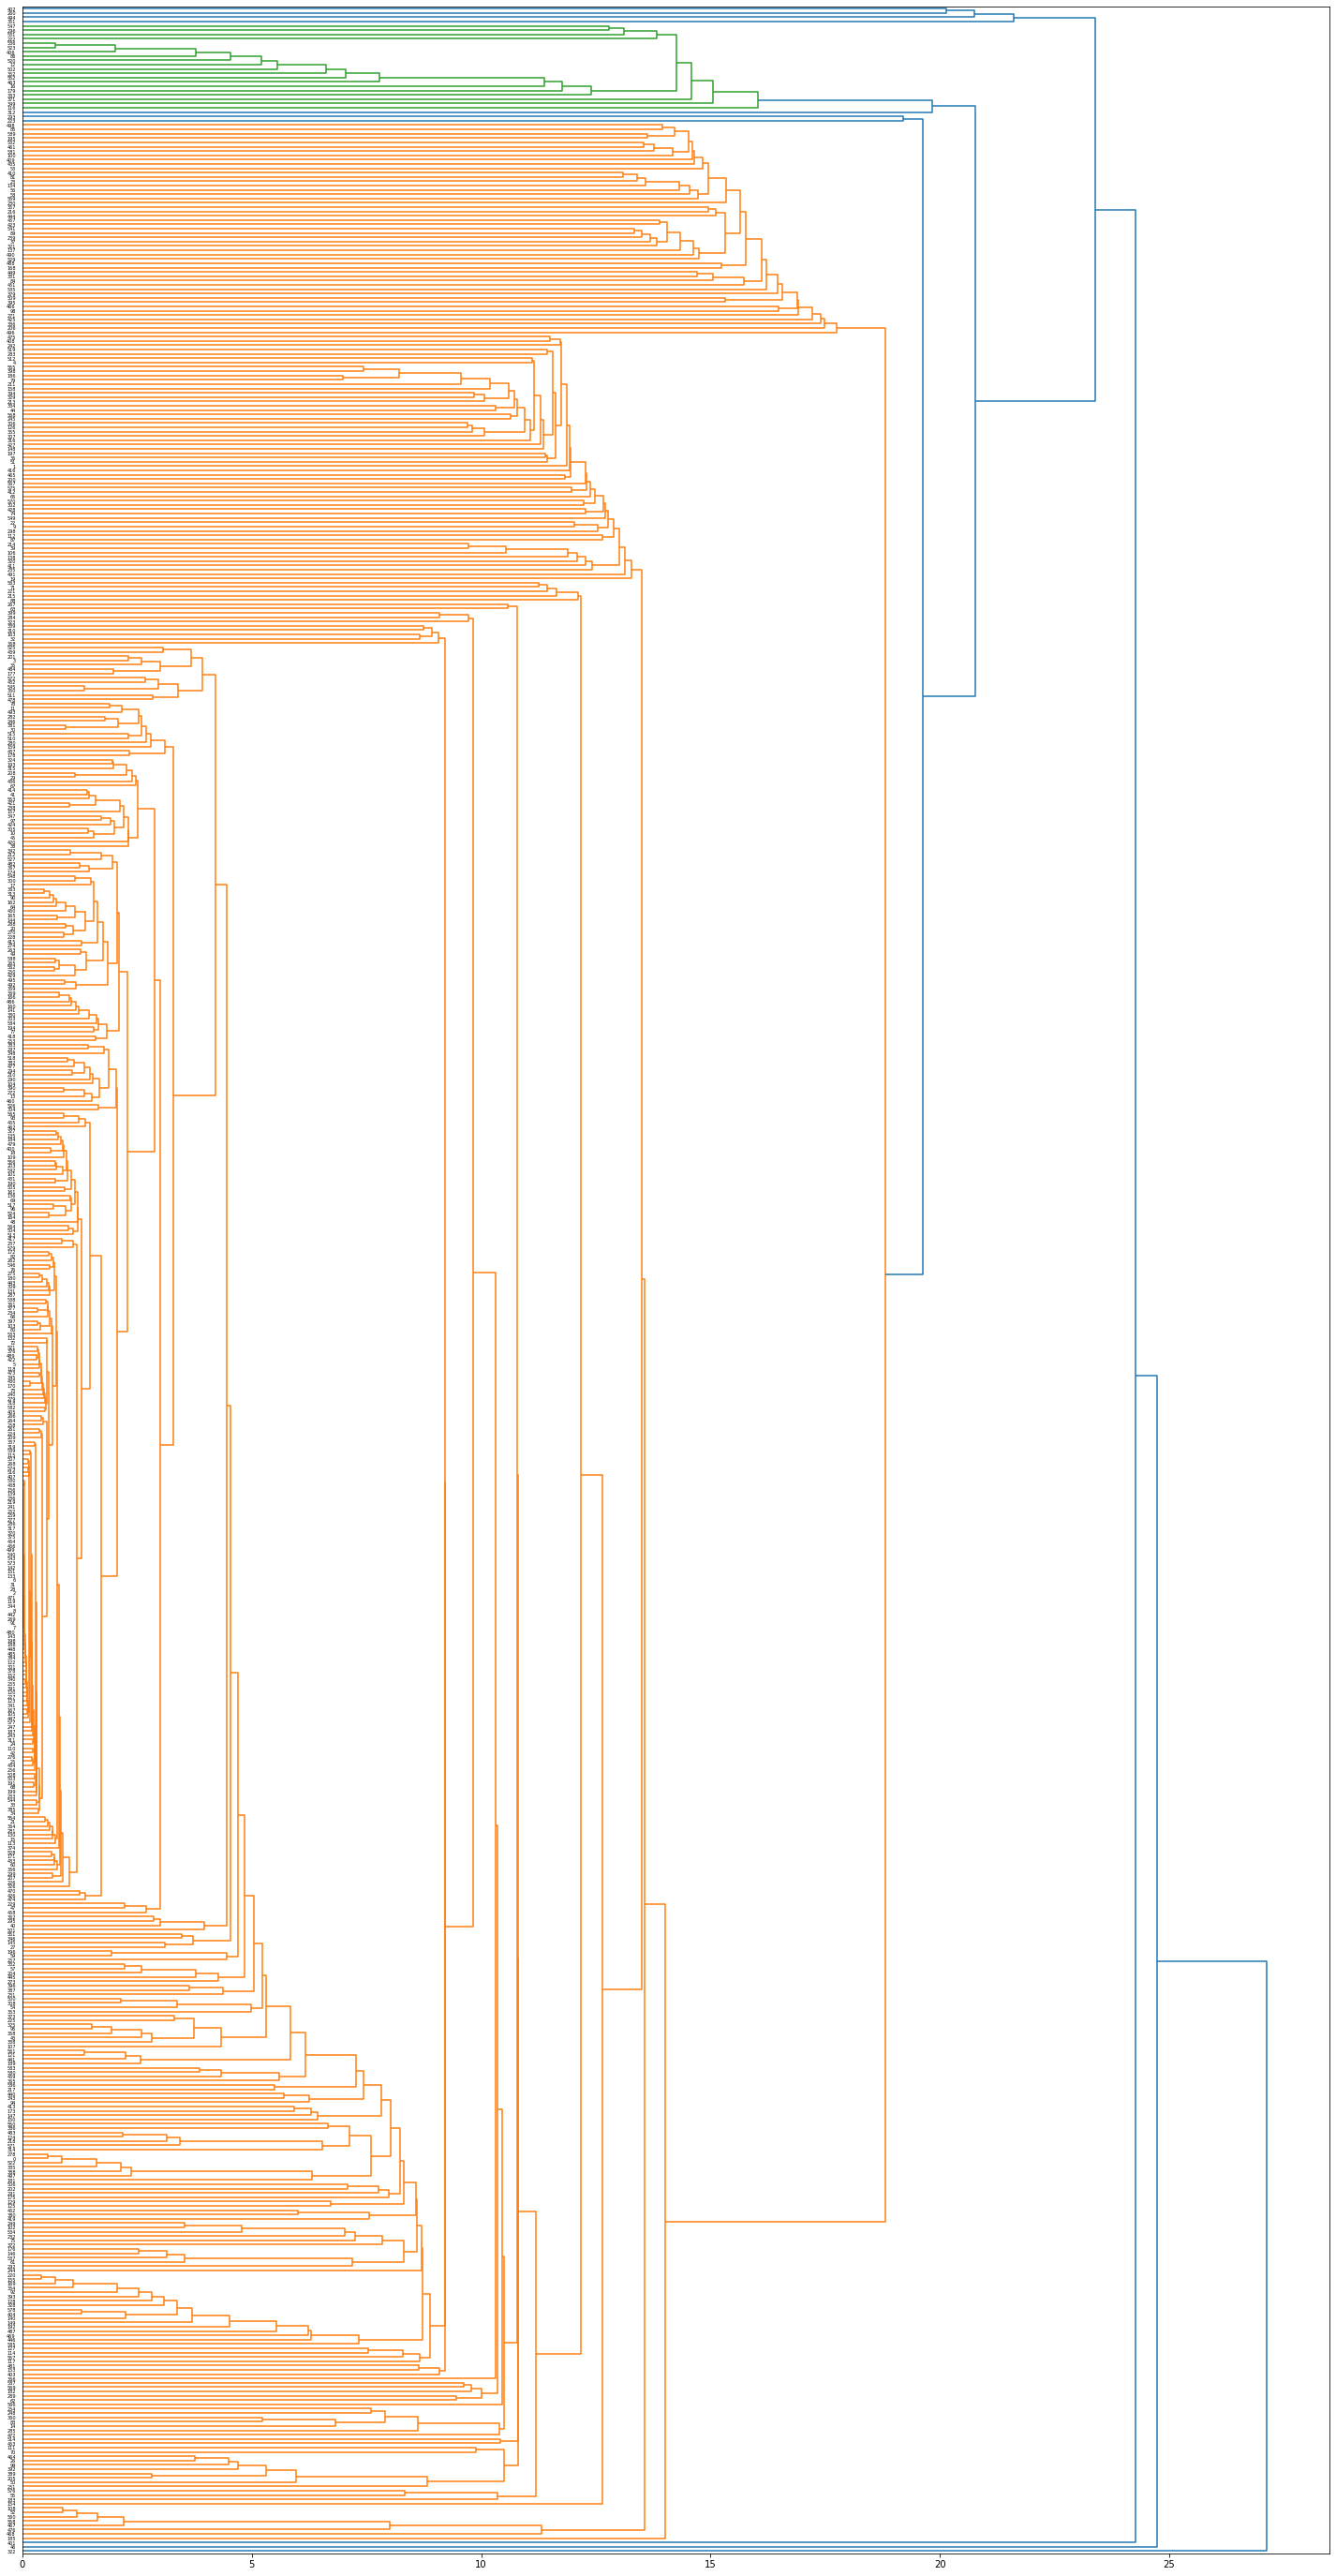

In [234]:
# first build a pairwise distances array between all users
dists = pdist(X_after_rd_scaled, 'euclidean')
# build linkage matrix
linkage_matrix = linkage(dists, 'ward')
# plot the dendrogram
fig = plt.figure(figsize=(25, 50))
dn = dendrogram(linkage_matrix, orientation='right')
plt.show()
# cut the linkage matrix at the specified distance
# fcluster(linkage_matrix, 100, 'distance')

In [239]:
assignments = fcluster(linkage_matrix, 10, 'distance')
silhouette_score(X_after_rd_scaled, assignments)

0.31120857430310805

## DBSCAN

In [152]:
clustering = DBSCAN(eps=5, min_samples=5, metric='euclidean').fit(X_after_rd)
silhouette_score(X_after_rd, clustering.labels_)

0.4213108143564272

In [183]:
clustering = DBSCAN(eps=5, min_samples=5, metric='euclidean').fit(X_after_rd_scaled)
silhouette_score(X_after_rd_scaled, clustering.labels_)

0.4284054441212709

## K-means

In [187]:
def kmeans(_df):
    distortions = []
    K = range(10,100)
    for k in tqdm(K):
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(_df)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

100%|██████████| 90/90 [01:00<00:00,  1.48it/s]


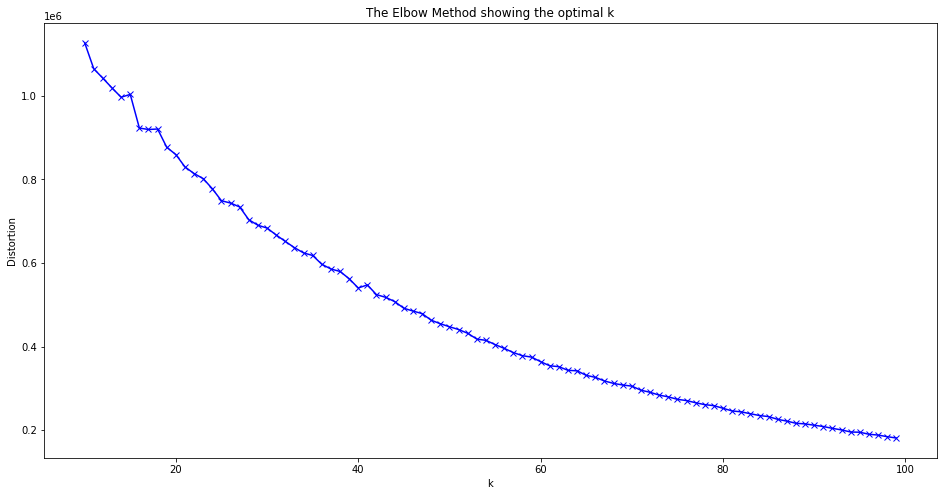

In [188]:
kmeans(X_after_rd)

100%|██████████| 90/90 [00:46<00:00,  1.95it/s]


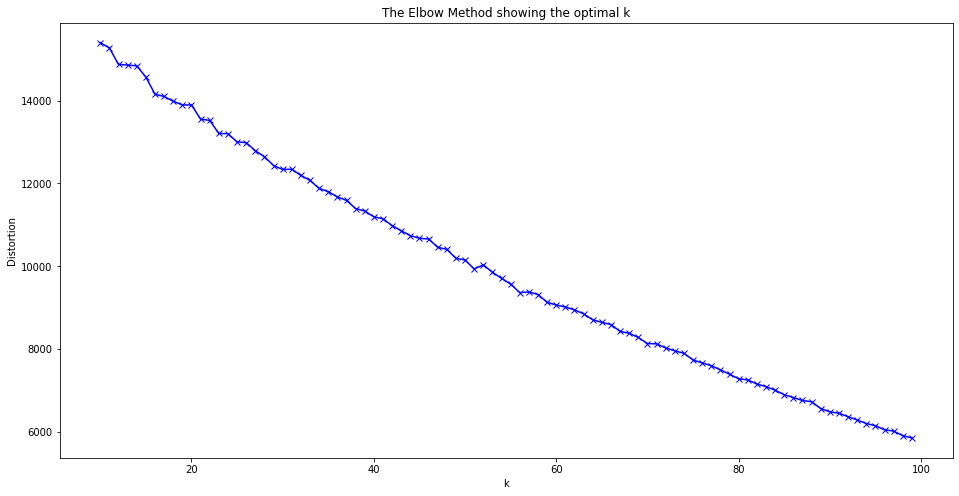

In [189]:
kmeans(X_after_rd_scaled)

In [242]:
kmeanModel = KMeans(n_clusters=100)
kmeanModel.fit(X_after_rd)
silhouette_score(X_after_rd, kmeanModel.labels_)


0.5621499413330674

In [243]:
kmeanModel = KMeans(n_clusters=100)
kmeanModel.fit(X_after_rd_scaled)
silhouette_score(X_after_rd_scaled, kmeanModel.labels_)


0.32402204900158005

## Spectual Clusetring

In [153]:
s_clustering = SpectralClustering(n_clusters=100,
                assign_labels='discretize',
                random_state=0).fit(X_after_rd)

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [154]:
silhouette_score(X_after_rd, clustering.labels_)

0.4213108143564272

In [241]:
s_clustering = SpectralClustering(n_clusters=100,
                assign_labels='discretize',
                random_state=0).fit(X_after_rd_scaled)
silhouette_score(X_after_rd_scaled, clustering.labels_)

0.4284054441212709

# Visualization

In [201]:
from sklearn.manifold import TSNE
data_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X_after_rd_scaled)


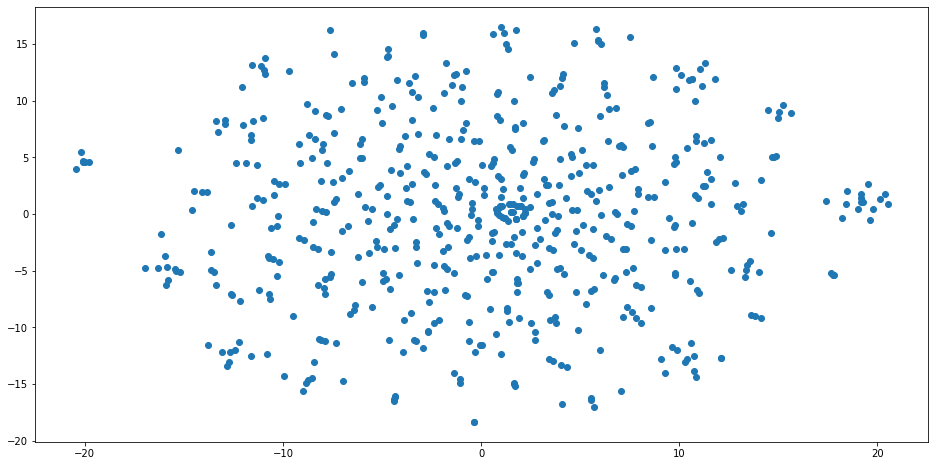

In [202]:

def scatter(X):
    plt.figure(figsize=(16,8))
    plt.scatter(X[:, 0], X[:, 1])
scatter(data_embedded)